# a07.Grammer Check

To check simple English languge grammar error.

## This system

**LanguageTool**

An python port to call JAVA server behind. This system is modified with keeping the with spaces before and after period and comma.

## Testing datasets
#### 1. CoNLL-2014 (1312 sentences)

[https://www.comp.nus.edu.sg/~nlp/conll14st.html](https://www.comp.nus.edu.sg/~nlp/conll14st.html)

#### 2. JFLEG (729 sentences)

[https://github.com/keisks/jfleg](https://github.com/keisks/jfleg)


## Test methods
#### 1. MaxMatch (M^2) Scorer

[https://github.com/nusnlp/m2scorer](https://github.com/nusnlp/m2scorer)
#### 2. GLEU

Automatic Evaluation of Sentence-Level Fluency [https://www.nltk.org/_modules/nltk/translate/gleu_score.html](https://www.nltk.org/_modules/nltk/translate/gleu_score.html)

## Test platform

- CPU: Intel® Core™ i5 CPU M 480 @ 2.67GHz
- RAM: 4GB
- OS: Ubuntu 18.04 64-bit

## Other Libraries
1. https://pypi.org/project/language-check/

2. https://github.com/PiyKat/Grammar-Checker
    * Cornell Movie-Dialogs Corpus (https://github.com/PiyKat/Grammar-Checker#biased-decoding)

3. https://github.com/bencmbrook/Grammar-Checker
    * Context-Free Grammar: Hidden Markov Models, Viterbi algorithum

4. https://towardsdatascience.com/essential-text-correction-process-for-nlp-tasks-f731a025fcc3

In [1]:
#! pip install -U language-check
from useLangTool import *

useLangTool.test_word : 1.0939984349533916e-06


# Dataset: CoNLL-2014 (set "m2 example")

In [2]:
filepath = "./grammar_check/m2scorer/example/"

arr_text = []
with open(f"{filepath}source_gold", mode="r", encoding="utf8") as f:
    text = f.read()
    arr_text = text.split("\n\n")

In [3]:
# Prepare source and golden text
coll_origin = []
coll_correct = []
for idx in range(0, len(arr_text)):
    aori, acorr = correct_sent(arr_text[idx])
    # print(arr_text[idx])
    coll_origin.append(aori)
    coll_correct.append(acorr)

with open("./grammar_check/m2example.src", mode="w", encoding="utf8") as f:
    f.write("\n".join(coll_origin))

with open("./grammar_check/m2example.ref", mode="w", encoding="utf8") as f:
    f.write("\n".join(coll_correct))

In [4]:
# this system:
a, _ = load_data(filepath="./grammar_check/", src="m2example.src", ref="m2example.ref")
arr_texts1, arr_texts = a
gcoll, _ = batch_process(arr_texts1, arr_texts)
with open("./grammar_check/this_system_m2example.src", mode="w", encoding="utf8") as f:
    f.write("\n".join(gcoll))

useLangTool.load_data : 0.000992421992123127
useLangTool.batch_process : 5.307856676998199


# Dataset: CoNLL-2014 (set "noalt/official-2014")

In [5]:
filepath = "./grammar_check/conll14st-test-data/noalt/"

arr_text = []
with open(f"{filepath}official-2014.0.m2", mode="r", encoding="utf8") as f:
    text = f.read()
    arr_text = text.split("\n\n")

In [6]:
# Prepare source and golden text
coll_origin = []
coll_correct = []
for idx in range(0, len(arr_text)):
    aori, acorr = correct_sent(arr_text[idx])
    # print(arr_text[idx])
    coll_origin.append(aori)
    coll_correct.append(acorr)

with open("./grammar_check/CoNLL-2014.src", mode="w", encoding="utf8") as f:
    f.write("\n".join(coll_origin))

with open("./grammar_check/CoNLL-2014.ref", mode="w", encoding="utf8") as f:
    f.write("\n".join(coll_correct))

In [7]:
# this system:
a, _ = load_data(filepath="./grammar_check/", src="CoNLL-2014.src", ref="CoNLL-2014.ref")
arr_texts1, arr_texts = a
gcoll, _ = batch_process(arr_texts1, arr_texts)
with open("./grammar_check/this_system_CoNLL-2014.src", mode="w", encoding="utf8") as f:
    f.write("\n".join(gcoll))

useLangTool.load_data : 0.0029781890043523163
useLangTool.batch_process : 43.55223353700421


# Evaluation accuracy (test: MaxMatch (M^2) Scorer)

In [8]:
# self match: set "system"
! python3 ./grammar_check/m2scorer/scripts/m2scorer.py "./grammar_check/m2scorer/example/system" "./grammar_check/m2scorer/example/source_gold"

Precision   : 0.8000
Recall      : 0.8000
F_0.5       : 0.8000


In [9]:
# self match: set "example"
! python3 ./grammar_check/m2scorer/scripts/m2scorer.py "./grammar_check/m2example.ref" "./grammar_check/m2scorer/example/source_gold"

Precision   : 1.0000
Recall      : 1.0000
F_0.5       : 1.0000


In [10]:
# this system: set "example"
! python3 ./grammar_check/m2scorer/scripts/m2scorer.py "./grammar_check/this_system_m2example.src" "./grammar_check/m2scorer/example/source_gold"

Precision   : 1.0000
Recall      : 0.0000
F_0.5       : 0.0000


In [11]:
# self match: set "noalt/official-2014"
! python3 ./grammar_check/m2scorer/scripts/m2scorer.py "./grammar_check/CoNLL-2014.ref" "./grammar_check/conll14st-test-data/noalt/official-2014.0.m2"

Precision   : 0.9069
Recall      : 0.8026
F_0.5       : 0.8839


In [12]:
# this system: set "noalt/official-2014"
! python3 ./grammar_check/m2scorer/scripts/m2scorer.py "./grammar_check/this_system_CoNLL-2014.src" "./grammar_check/conll14st-test-data/noalt/official-2014.0.m2"

Precision   : 0.2125
Recall      : 0.0385
F_0.5       : 0.1116


## Results

> F-0.5 the higher, the better.(0 means totally no correction.)

System	 | 	MaxMatch (M^2) Score(F-0.5)
:------- | --------:
No edit	 | 	-
CAMB14	 | 	37.33
CAMB16	 | 	39.90
CAMB17	 | 	51.08
CUUI	 | 	36.79
VT16	 | 	47.40
AMU14	 | 	35.01
AMU16	 | 	49.49
NUS16	 | 	44.27
NUS17	 | 	53.14
NUS18	 | 	54.79
Nested-RNN-seq2seq	 | 	45.15
Back-CNN-seq2seq	 | 	49.00
Adapted-transformer	 | 	55.80
SMT-NMT hybrid	 | 	56.25
Base convolutional seq2seq	 | 	57.95
Base + FB learning	 | 	61.34
Base + FB learning and inference	 | 	60.00
LanguageTool **This system** | 11.16

<hr>

# Dataset: JFLEG (set "dev")

In [13]:
# dev
a, _ = load_data(filepath="./grammar_check/jfleg/dev/", src="dev.src", ref="dev.ref0")
arr_texts1, arr_texts = a
gcoll, _ = batch_process(arr_texts1, arr_texts)
with open("./grammar_check/this_system_dev.src", mode="w", encoding="utf8") as f:
    f.write("\n".join(gcoll))

useLangTool.load_data : 0.293081975003588
useLangTool.batch_process : 22.521676500997273


# Dataset: JFLEG (set "test")

In [14]:
# test
a, _ = load_data(filepath="./grammar_check/jfleg/test/", src="test.src", ref="test.ref0")
arr_texts1, arr_texts = a
gcoll, _ = batch_process(arr_texts1, arr_texts)
with open("./grammar_check/this_system_test.src", mode="w", encoding="utf8") as f:
    f.write("\n".join(gcoll))

useLangTool.load_data : 0.25506660700193606
useLangTool.batch_process : 21.152872982012923


# Evaluation accuracy (test: GLEU)

In [15]:
# self match: dev
! python3 ./grammar_check/jfleg/eval/gleu.py -r ./grammar_check/jfleg/dev/dev.ref[0-3] -s ./grammar_check/jfleg/dev/dev.src --hyp ./grammar_check/jfleg/dev/dev.ref3

Running GLEU...
./grammar_check/jfleg/dev/dev.ref3
[['0.659302', '0.011223', '(0.637,0.681)']]


In [16]:
# this system: dev
! python3 ./grammar_check/jfleg/eval/gleu.py -r ./grammar_check/jfleg/dev/dev.ref[0-3] -s ./grammar_check/jfleg/dev/dev.src --hyp ./grammar_check/this_system_dev.src

Running GLEU...
./grammar_check/this_system_dev.src
[['0.453275', '0.009164', '(0.435,0.471)']]


In [17]:
# self match: test
! python3 ./grammar_check/jfleg/eval/gleu.py -r ./grammar_check/jfleg/test/test.ref[0-3] -s ./grammar_check/jfleg/test/test.src --hyp ./grammar_check/jfleg/test/test.ref3

Running GLEU...
./grammar_check/jfleg/test/test.ref3
[['0.728818', '0.009252', '(0.711,0.747)']]


In [18]:
# this system: test
! python3 ./grammar_check/jfleg/eval/gleu.py -r ./grammar_check/jfleg/test/test.ref[0-3] -s ./grammar_check/jfleg/test/test.src --hyp ./grammar_check/this_system_test.src

Running GLEU...
./grammar_check/this_system_test.src
[['0.491532', '0.008335', '(0.475,0.508)']]


## Results

> GLEU the higher, the better

N.B. Sytems with asterisk (*) are tuned on different data. 

System                     | GLEU (dev) | GLEU (test)
---------------------------------------- | :--------: | :---------:
[Ge et al. (2018)](https://arxiv.org/pdf/1807.01270.pdf)         |  N/A | 62.42
[Grundkiewicz and Junczys-Dowmunt (2018)](https://arxiv.org/pdf/1804.05945.pdf)         |  N/A | 61.50
[Junczys-Dowmunt et al. (2018)](https://arxiv.org/pdf/1804.05940.pdf)         |  N/A | 59.90
[Chollampatt and Ng (2018)](https://arxiv.org/pdf/1801.08831.pdf)         |  52.48 | 57.47
[Chollampatt and Ng (2017)](http://www.aclweb.org/anthology/W17-5037)         |  51.01 | 56.78
[Xie et al. (2018)*](http://www.aclweb.org/anthology/N18-1057)         |  N/A | 56.20
[Sakaguchi et al. (2017)](https://arxiv.org/pdf/1707.00299.pdf)         |  49.82 | 53.98
[Ji et al. (2017)*](http://aclweb.org/anthology/P/P17/P17-1070.pdf)      |  48.93 | 53.41
[Yuan and Briscoe (2016)* ](http://www.aclweb.org/anthology/N16-1042)   |  47.20 | 52.05
[Junczys-Dowmunt and Grundkiewicz (2016) ](https://www.aclweb.org/anthology/D/D16/D16-1161.pdf) |  49.74 | 51.46
[Chollampatt et al. (2016)* ](https://aclweb.org/anthology/D/D16/D16-1195.pdf) |  46.27     | 50.13
LanguageTool (2020) **This system** | 45.32 | 49.15
[Felice et al. (2014)* ](http://www.aclweb.org/anthology/W14-1702)      |  42.81 | 46.04
=================================== | ========== | ==========
SOURCE    |  38.21 | 40.54
REFERENCE |  55.26 | 62.37

Courtney Napoles, Keisuke Sakaguchi and Joel Tetreault. (EACL 2017): JFLEG: A Fluency Corpus and Benchmark for Grammatical Error Correction. In Proceedings of the 15th Conference of the European Chapter of the Association for Computational Linguistics. Valencia, Spain. April 03-07, 2017.

Michael Heilman, Aoife Cahill, Nitin Madnani, Melissa Lopez, Matthew Mulholland, and Joel Tetreault. (ACL 2014): Predicting Grammaticality on an Ordinal Scale. In Proceedings of the Association for Computational Linguistics. Baltimore, MD, USA. June 23-25, 2014.

<hr>

# Evaluate time complexity
- time spent for all rows
- time spent in 1 rows for 10 times, take average
- time spent in 10 rows for 10 times, take average
- time spent in 100 rows for 10 times, take average
- time spent in 500 rows for 10 times, take average

dataset                     | min Time(s)  | max Time(s)
---------------------------------------- | :--------: | :---------:
JFLEG: dev | 21 | 31
JFLEG: test | 21 | 29
CoNLL-2014: official-2014.0.m2 | 38.42 | 39.69

In [19]:
import random
a, _ = load_data(filepath="./grammar_check/jfleg/test/", src="test.src", ref="test.ref0")
arr_texts1, arr_texts = a
durations = []

useLangTool.load_data : 0.002185174002079293


In [20]:
# 1 row
rows_size = 1
repeat_times = 10

start = time.perf_counter()
for idx in range(repeat_times):
    random.shuffle(arr_texts1)
    gcoll = batch_process(arr_texts1[:rows_size], arr_texts[:rows_size])
end = time.perf_counter()

duration = (end - start) / repeat_times
durations.append(duration)
print(f"Average: {duration} sec.")

useLangTool.batch_process : 0.03864745500322897
useLangTool.batch_process : 0.032126423000590876
useLangTool.batch_process : 0.026771745993755758
useLangTool.batch_process : 0.030432576008024625
useLangTool.batch_process : 0.03782075199706014
useLangTool.batch_process : 0.04788685899984557
useLangTool.batch_process : 0.03309501700277906
useLangTool.batch_process : 0.030575526994653046
useLangTool.batch_process : 0.029101879001245834
useLangTool.batch_process : 0.022385649994248524
Average: 0.03416799580008956 sec.


In [21]:
# 10 rows
rows_size = 10
repeat_times = 10

start = time.perf_counter()
for idx in range(repeat_times):
    random.shuffle(arr_texts1)
    gcoll = batch_process(arr_texts1[:rows_size], arr_texts[:rows_size])
end = time.perf_counter()

duration = (end - start) / repeat_times
durations.append(duration)
print(f"Average: {duration} sec.")

useLangTool.batch_process : 0.2868796060065506
useLangTool.batch_process : 0.27564186400559265
useLangTool.batch_process : 0.29716904798988253
useLangTool.batch_process : 0.2883976520097349
useLangTool.batch_process : 0.282445306002046
useLangTool.batch_process : 0.2721817299898248
useLangTool.batch_process : 0.2648299419961404
useLangTool.batch_process : 0.29059570700337645
useLangTool.batch_process : 0.30138484500639606
useLangTool.batch_process : 0.2662557760049822
Average: 0.28399435820028884 sec.


In [22]:
# 100 rows
rows_size = 100
repeat_times = 10

start = time.perf_counter()
for idx in range(repeat_times):
    random.shuffle(arr_texts1)
    gcoll = batch_process(arr_texts1[:rows_size], arr_texts[:rows_size])
end = time.perf_counter()

duration = (end - start) / repeat_times
durations.append(duration)
print(f"Average: {duration} sec.")

useLangTool.batch_process : 2.815785026003141
useLangTool.batch_process : 2.751420877990313
useLangTool.batch_process : 2.9506414710049285
useLangTool.batch_process : 2.8600559440092184
useLangTool.batch_process : 2.8053769249963807
useLangTool.batch_process : 2.9383934439974837
useLangTool.batch_process : 3.0228734650008846
useLangTool.batch_process : 3.1248114930058364
useLangTool.batch_process : 2.847776562004583
useLangTool.batch_process : 2.9706771729979664
Average: 2.9102340147990615 sec.


In [23]:
# 500 rows
rows_size = 500
repeat_times = 10

start = time.perf_counter()
for idx in range(repeat_times):
    random.shuffle(arr_texts1)
    gcoll = batch_process(arr_texts1[:rows_size], arr_texts[:rows_size])
end = time.perf_counter()

duration = (end - start) / repeat_times
durations.append(duration)
print(f"Average: {duration} sec.")

useLangTool.batch_process : 14.844766808993882
useLangTool.batch_process : 13.901045325997984
useLangTool.batch_process : 13.771462859993335
useLangTool.batch_process : 13.735505282995291
useLangTool.batch_process : 13.925917529006256
useLangTool.batch_process : 13.7657887940004
useLangTool.batch_process : 13.644358473989996
useLangTool.batch_process : 14.12613372899068
useLangTool.batch_process : 13.892056167998817
useLangTool.batch_process : 13.890444916993147
Average: 13.950992989599763 sec.


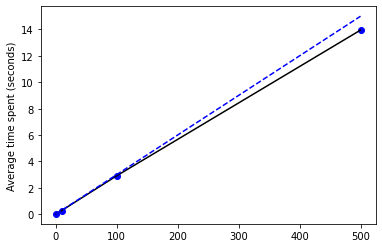

In [24]:
import matplotlib.pyplot as plt
plt.plot([1, 10, 100, 500], durations, 'bo',
         [1, 10, 100, 500], durations, 'k',
         [1, 10*50], [0.03, 0.3*50], 'b--')
plt.ylabel('Average time spent (seconds)')
plt.show()

Time complexity: O(n), linear

In [25]:
# End

In [26]:
text = "Giant otters is an apex predator."
tool.check(text)

[]